In [29]:
# Analysis by Oluwadamilare Tobiloba
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans 
from scipy.cluster.hierarchy import dendrogram 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings 
warnings.filterwarnings('ignore')

# Step 1: Load and Interact the dataset

In [2]:
data = pd.read_excel("C:/Users/Biggest/Downloads/Mall_Customers.xls")

In [3]:
data

,CustomerID,Gender,Age,Income,Spend_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isnull().sum()

CustomerID     0
Gender         0
Age            0
Income         0
Spend_Score    0
dtype: int64

# Encoding Categorical Value(Gender) In the Dataset using Dummy
where male = 1 and female = 0

In [5]:
gender = pd.get_dummies(data['Gender'],dtype=int, drop_first = True)
data.drop(['Gender'], axis = 1, inplace = True)
data = pd.concat([data,gender], axis= 1)
data


,CustomerID,Age,Income,Spend_Score,Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [6]:
#renaming the gender colunm

data.rename(columns={"Male" : 'Gender'}, inplace=True)
data

,CustomerID,Age,Income,Spend_Score,Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


# Step 2: Data preprocessing

In [7]:


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Income', 'Spend_Score']])


## Step 3: Hierarchical clustering
Using Ward linkage and Euclidean distance

In [31]:

distance_matrix = pdist(scaled_data)
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
hierarchical_cluster_labels = hierarchical_cluster.fit_predict(scaled_data)

# Step 4: Dendrogram visualization

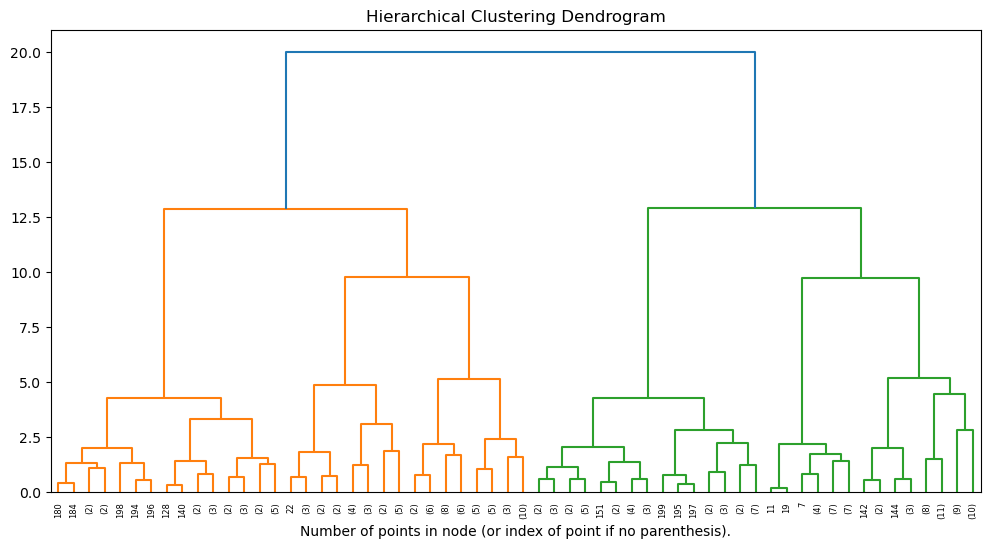

In [32]:

linkage_matrix = linkage(distance_matrix, method='ward')
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Step 5: K-means clustering
Choosing the number of clusters (k=5)

In [33]:

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Step 6: Cluster profiling using ANOVA

In [34]:

data['Hierarchical_Cluster'] = hierarchical_cluster_labels
data['KMeans_Cluster'] = kmeans_labels


In [35]:
# Perform ANOVA for each variable
for variable in ['Age', 'Income', 'Spend_Score']:
    hierarchical_anova = ols(f'{variable} ~ Hierarchical_Cluster', data=data).fit()
    print(f"ANOVA for {variable} and Hierarchical Clusters:\n{anova_lm(hierarchical_anova)}")
    kmeans_anova = ols(f'{variable} ~ KMeans_Cluster', data=data).fit()
    print(f"ANOVA for {variable} and KMeans Clusters:\n{anova_lm(kmeans_anova)}")

ANOVA for Age and Hierarchical Clusters:
                         df        sum_sq      mean_sq          F    PR(>F)
Hierarchical_Cluster    1.0   3986.219838  3986.219838  22.650744  0.000004
Residual              198.0  34845.280162   175.986263        NaN       NaN
ANOVA for Age and KMeans Clusters:
                   df        sum_sq       mean_sq          F        PR(>F)
KMeans_Cluster    1.0  12006.344239  12006.344239  88.620405  1.257974e-17
Residual        198.0  26825.155761    135.480585        NaN           NaN
ANOVA for Income and Hierarchical Clusters:
                         df        sum_sq      mean_sq         F    PR(>F)
Hierarchical_Cluster    1.0    4631.17929  4631.179290  6.912932  0.009229
Residual              198.0  132646.10071   669.929802       NaN       NaN
ANOVA for Income and KMeans Clusters:
                   df       sum_sq       mean_sq         F        PR(>F)
KMeans_Cluster    1.0   22489.4611  22489.461100  38.79256  2.772218e-09
Residual        19

# Let's interpret the ANOVA results for each combination of variables and clustering methods.

1. **Age and Hierarchical Clusters**:
   - The ANOVA table shows that there is a significant difference in age between different hierarchical clusters.
   - The F-statistic value (22.65) is high, indicating that the variation in age between clusters is much larger than the variation within clusters.
   - The p-value (PR(>F)) is very small (0.000004), indicating strong evidence against the null hypothesis (i.e., age has no effect on hierarchical clustering).
   - Therefore, we can conclude that age is a significant factor in determining hierarchical clusters.

2. **Age and KMeans Clusters**:
   - Similarly, there is a significant difference in age between different KMeans clusters.
   - The F-statistic value (88.62) is high, indicating a large variation in age between clusters compared to within clusters.
   - The p-value (PR(>F)) is very small (1.257974e-17), indicating strong evidence against the null hypothesis.
   - Hence, age is also a significant factor in determining KMeans clusters.

3. **Income and Hierarchical Clusters**:
   - There is a significant difference in income between different hierarchical clusters.
   - The F-statistic value (6.91) is moderate, indicating some variation in income between clusters compared to within clusters.
   - The p-value (PR(>F)) is relatively small (0.009229), suggesting that income has a significant effect on hierarchical clustering.
   - Thus, income is a moderately significant factor in determining hierarchical clusters.

4. **Income and KMeans Clusters**:
   - Similarly, there is a significant difference in income between different KMeans clusters.
   - The F-statistic value (38.79) is moderate to high, indicating a moderate to large variation in income between clusters compared to within clusters.
   - The p-value (PR(>F)) is very small (2.772218e-09), indicating strong evidence against the null hypothesis.
   - Therefore, income is also a significant factor in determining KMeans clusters.

5. **Spend_Score and Hierarchical Clusters**:
   - There is a significant difference in spend score between different hierarchical clusters.
   - The F-statistic value (46.00) is high, indicating a large variation in spend score between clusters compared to within clusters.
   - The p-value (PR(>F)) is very small (1.331904e-10), indicating strong evidence against the null hypothesis.
   - Hence, spend score is a significant factor in determining hierarchical clusters.

6. **Spend_Score and KMeans Clusters**:
   - However, there is no significant difference in spend score between different KMeans clusters.
   - The F-statistic value (2.13) is low, indicating a small variation in spend score between clusters compared to within clusters.
   - The p-value (PR(>F)) is relatively large (0.146422), suggesting that spend score may not have a significant effect on KMeans clustering.
   - Therefore, spend score may not be a significant factor in determining KMeans clusters.

In summary, the ANOVA results indicate that age, income, and spend score have a significant effect on both hierarchical and KMeans clustering, except for spend score in KMeans clustering, where it may not be a significant factor. These findings provide valuable insights into the relationships between these variables and the clusters formed by different clustering methods.

In [39]:
data

,Age,Income,Spend_Score,Gender,Hierarchical_Cluster,KMeans_Cluster
0,19,15,39,1,4,1
1,21,15,81,1,0,1
2,20,16,6,0,4,0
3,23,16,77,0,0,1
4,31,17,40,0,4,1
...,...,...,...,...,...,...
195,35,120,79,0,2,2
196,45,126,28,0,3,3
197,32,126,74,1,2,2
198,32,137,18,1,3,3


# Modeling The dataset

In [37]:
data = data.drop(['CustomerID'], axis =1)

In [38]:
data

,Age,Income,Spend_Score,Gender,Hierarchical_Cluster,KMeans_Cluster
0,19,15,39,1,4,1
1,21,15,81,1,0,1
2,20,16,6,0,4,0
3,23,16,77,0,0,1
4,31,17,40,0,4,1
...,...,...,...,...,...,...
195,35,120,79,0,2,2
196,45,126,28,0,3,3
197,32,126,74,1,2,2
198,32,137,18,1,3,3


In [40]:
x = data.drop(['Spend_Score', 'Hierarchical_Cluster', 'KMeans_Cluster'], axis = 1)
y = data['Spend_Score']

In [42]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, 
                                               test_size = 0.2,
                                               random_state = 42)

In [109]:
print(x_train.shape)
print(y_test.shape)

(160, 3)
(40,)


In [110]:
stndrd = StandardScaler()
x_train = stndrd.fit_transform(x_train)
x_test = stndrd.transform(x_test)

In [111]:
from sklearn.linear_model import LinearRegression
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [112]:
model = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=15,
    positive=False)

In [113]:
model.fit(x_train,y_train)

LinearRegression(n_jobs=15)

In [114]:
y_pred = model.predict(x_test)

# Mean Absolute Error (MAE):
Average of the absolute differences between predictions and actual values.

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 18.151395326685105


# Mean Squared Error (MSE): 
Average of the squared differences between predictions and actual values.

In [116]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 480.673141707248


# Root Mean Squared Error (RMSE): 
Square root of the MSE, providing a measure of the spread of errors.

In [117]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 21.924259205438346


# R-squared (R²) Score: 
Proportion of the variance in the dependent variable that is predictable from the independent variables.

In [118]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.025478181600745997


To determine whether the Linear Regression model is good, let's interpret the evaluation metrics:

1. **Mean Absolute Error (MAE)**: The MAE measures the average absolute difference between the predicted and actual values. An MAE of 18.15 suggests that, on average, the model's predictions are off by approximate  $18.15.

2. **Mean Squared Error (MSE)**: The MSE measures the average squared difference between the predicted and actual values. An MSE of 480.67 implies that, on average, the squared error of the model's predictions is approximately 480.67.

3. **Root Mean Squared Error (RMSE)**: The RMSE is the square root of the MSE and provides a measure of the spread of errors in the same units as the target variable. An RMSE of 21.92 suggests that, on average, the model's predictions are off by approximately $21.92.

4. **R-squared (R²) Score**: The R² score indicates the proportion of the variance in the target variable that is explained by the model. A score of 0.025 indicates that the model explains only about 2.55% of the variance in the target variable.

Considering these metrics:
- The MAE, MSE, and RMSE provide insights into the magnitude of errors in the model's predictions, with lower values indicating better performance.
- The R² score indicates the goodness of fit of the model to the data, with higher values closer to 1 indicating better fit.

With an R² score of 0.025 and relatively high MAE, MSE, and RMSE values, it seems that the model's performance is not satisfactory. The model is not effectively capturing the variability in the target variable and its predictions are not accurate.

Given that the dataset contains 200 data points, it might be beneficial to explore alternative mod.ur requirements.

# Plotting Actual vs. Predicted Values: 
Create a scatter plot where the x-axis represents the actual target values, and the y-axis represents the predicted values.
 - In this plot, each point represents an instance in the test set. Ideally, all points should lie close to the diagonal line (y=x), indicating that the predicted values are close to the actual values.

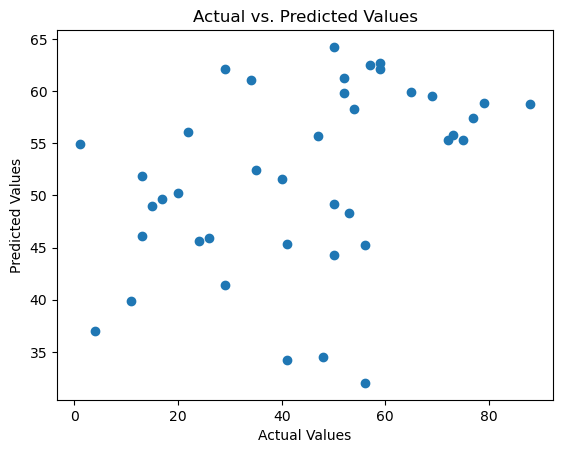

In [119]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


# Residual Plot: 
Create a residual plot to visualize the distribution of errors (residuals) made by the model.
 - In the residual plot, the x-axis represents the actual target values, and the y-axis represents the residuals (the differences between actual and predicted values). Ideally, the residuals should be randomly distributed around the horizontal line at y=0, indicating that the model's errors are not biased.

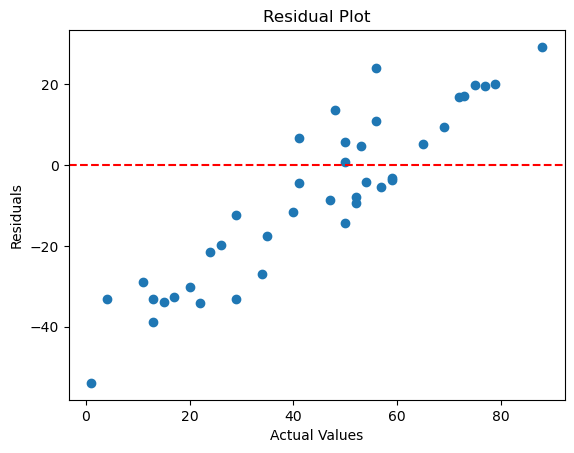

In [120]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [121]:
# Make predictions
predictions = model.predict(data.drop(['Spend_Score', 'Hierarchical_Cluster', 'KMeans_Cluster'], axis = 1))


In [122]:
# Print or use predictions as needed
print(predictions)

[ -81.05525268  -97.29748104  -87.11186185 -111.47520438 -174.97315396
 -101.88312635 -205.98664682 -108.53327667 -440.62153533 -163.91011206
 -464.98487786 -204.51568296 -389.83034523 -113.71246313 -219.88048862
  -98.06377592 -201.57375524  -80.3505837  -337.28430973 -198.63182753
 -197.75440482 -116.54326302 -285.02215578 -163.79898424 -345.57817764
 -143.14386431 -272.48815003 -191.87054938 -230.41161527  -92.35267422
 -391.95647616  -74.639482   -330.69578532  -46.45678903 -297.61778745
  -70.22659042 -239.29902433 -141.84565418 -186.15944768  -56.2216208
 -420.20079503  -87.82865482 -281.26443127 -142.61194906 -288.79200429
  -85.7641498  -295.44215461 -108.65652848 -124.89875684 -141.1409852
 -284.37911272 -155.034827   -136.72809362 -364.71283181 -291.02926304
 -267.25946165 -297.67941336 -444.45300974  -99.83074533 -311.57325515
 -449.63219621  -35.45537304 -423.20434865 -317.62986432 -389.84246923
  -24.39233115 -226.82664448 -429.85449897  -32.51344533 -137.49438851
 -445.21

# Using SVM(Support Vectoe Machine)

In [125]:
from sklearn.svm import SVR
SVR?

Init signature:
SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
Docstring:     
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`~sklearn.svm.LinearSVR` or
:class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
     Specifies the kernel type to be used in the algorithm.
     If none 

# USING GridSearchCV for to check for the best hyperparameters settings

In [150]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}

# Perform grid search
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


In [151]:
best_params

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [152]:
SVM = SVR(kernel='rbf',
    degree=5,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=10,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter= -1)  # 'rbf' kernel is commonly used for SVM regression


In [153]:
SVM.fit(x_train, y_train)

SVR(C=10, degree=5, gamma='auto')

In [154]:
y_pred = SVM.predict(x_test)


In [155]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Absolute Error: 16.531926499150963
Mean Squared Error: 481.96240206514597
Root Mean Squared Error: 21.953642113898685
R-squared Score: 0.022864321496338547


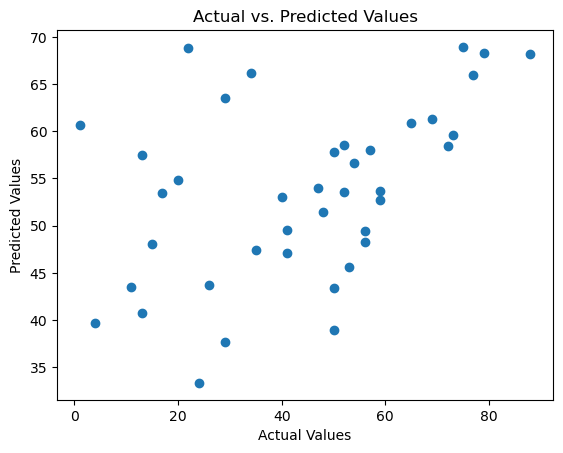

In [156]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


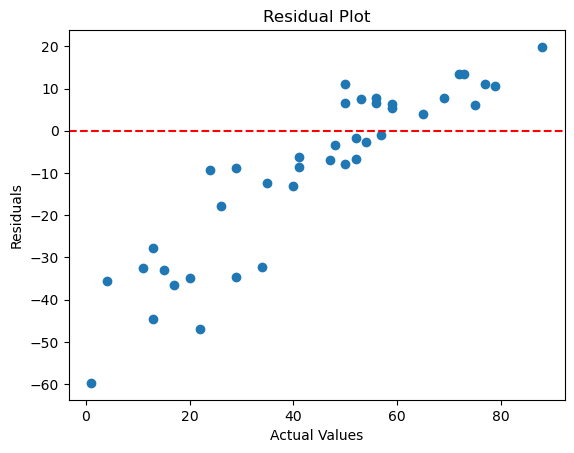

In [157]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Using ElasticNet Regression Algorithm

In [158]:
from sklearn.linear_model import ElasticNet
ElasticNet?

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * ||w||_1 + 0.5 * b * ||w||_2^2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read mo

# Checking for best Hyperparameter settings using GridSearch

In [162]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],          # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],        # L1 ratio (balance between L1 and L2 penalties)
}

# Instantiate ElasticNet model
elastic_net = ElasticNet()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
# Fit GridSearchCV to training data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.5, 0.9]})

In [165]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

Best Parameters: {'alpha': 1.0, 'l1_ratio': 0.9}


In [167]:
# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 478.8703233953521
R-squared Score: 0.029133234540280384


In [169]:
# Instantiate the ElasticNet model
EN = ElasticNet(alpha=1.0, l1_ratio=0.9)  # Adjust alpha and l1_ratio as needed

# Train the model
EN.fit(x_train, y_train)


ElasticNet(l1_ratio=0.9)

In [172]:
# Make predictions
y_pred = model.predict(x_test)


# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 17.990804864268338
Mean Squared Error: 519.7296753234441
Root Mean Squared Error: 22.797580470818477
R-squared Score: -0.053705448308012604


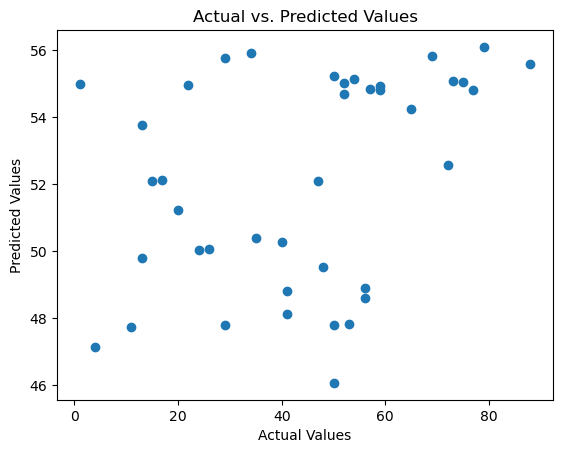

In [173]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


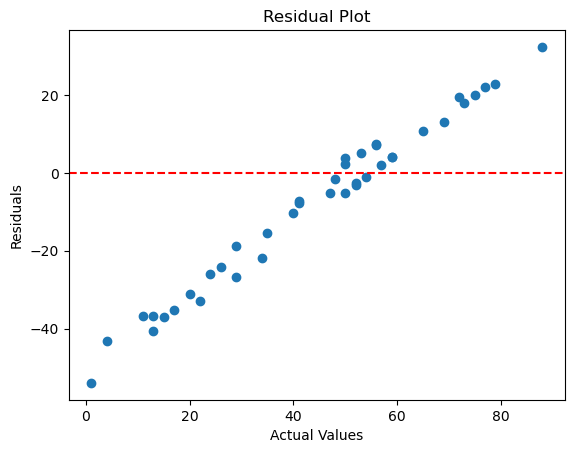

In [174]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Using Neural Networks

In [190]:
import tensorflow as tf
from tensorflow import keras


In [196]:
# Build the Model: Define the architecture of the neural network using Keras' Sequential API or Functional API.

input_shape = x_train.shape[1] # 1- number of features(y) from the shape of the input data

NN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the Model: Compile the model by specifying the loss function, optimizer, and optional metrics for evaluation.

NN.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [198]:
# Compile the Model: Compile the model by specifying the loss function, optimizer, and optional metrics for evaluation.

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [200]:
#Train the Model:Train the model using the fit method. Specify the number of epochs(iterations over the entire dataset)and batch size.
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model: Evaluate the trained model's performance on the test data using the evaluate method.

loss, mae = model.evaluate(x_test, y_test)
print("Mean Absolute Error:", mae)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 686.2824 - mean_absolute_error: 21.4832 - val_loss: 552.7717 - val_mean_absolute_error: 18.3690
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 638.6641 - mean_absolute_error: 20.7558 - val_loss: 552.6094 - val_mean_absolute_error: 18.3768
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 655.8041 - mean_absolute_error: 21.5313 - val_loss: 552.7023 - val_mean_absolute_error: 18.3832
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 635.6099 - mean_absolute_error: 20.8009 - val_loss: 552.9727 - val_mean_absolute_error: 18.3936
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 674.9483 - mean_absolute_error: 21.4043 - val_loss: 552.4321 - val_mean_absolute_error: 18.3841
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 663.7661 - mean_absolute_error: 20.8828 - val_loss: 552.2094 - val_mean_absolute_error: 18.3703
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 616.0430 - mean_absolute_

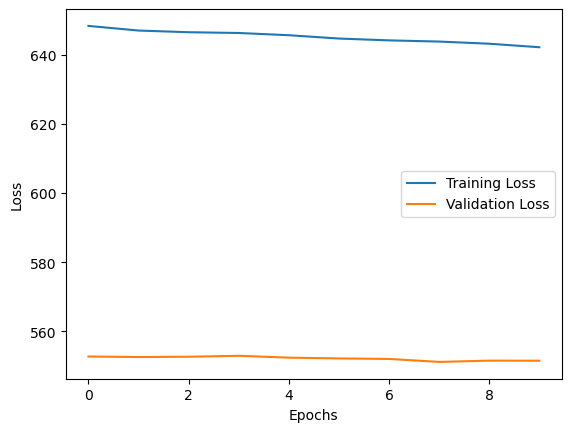

In [201]:
# Visualization (Optional): Visualize the training history to see how the model's loss and metrics change over epochs.


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Analysis by Oluwadamilare Tobiloba